<!--NOTEBOOK_HEADER-->
*This notebook contains material from [PyRosetta](https://RosettaCommons.github.io/PyRosetta.notebooks);
content is available [on Github](https://github.com/RosettaCommons/PyRosetta.notebooks.git).*

<!--NAVIGATION-->
< [Accessing PyRosetta Documentation](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/02.03-Accessing-PyRosetta-Documentation.ipynb) | [Contents](toc.ipynb) | [Index](index.ipynb) | [Protein Geometry](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/02.05-Protein-Geometry.ipynb) ><p><a href="https://colab.research.google.com/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/02.04-Getting-Spatial-Features-from-Pose.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Getting spatial features from a Pose
Keywords: conformation(), bond_length(), AtomID, atom_index()

In [ ]:
# Notebook setup
import sys
if 'google.colab' in sys.modules:
    !pip install pyrosettacolabsetup
    import pyrosettacolabsetup
    pyrosettacolabsetup.setup()
    print ("Notebook is set for PyRosetta use in Colab.  Have fun!")

In [ ]:
from pyrosetta import *
init()

**From previous section:**
Make sure you are in the directory with the pdb files:

`cd google_drive/My\ Drive/student-notebooks/`

In [ ]:
pose = pose_from_pdb("inputs/5tj3.pdb")

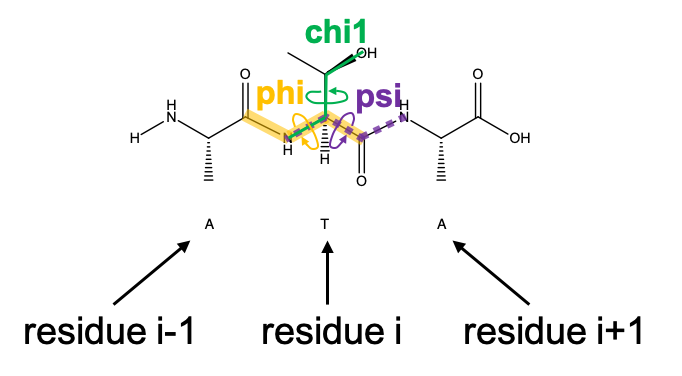

In [1]:
from IPython.display import Image
Image('./Media/dihedral-final.png',width='500')

`Pose` objects make it easy to access angles, distances, and torsions for analysis. Lets take a look at how to get backbone torsions first.

In [1]:
#resid = "get the pose residue number for chain A:res 28 using the pdb2pose function"
### BEGIN SOLUTION
resid = pose.pdb_info().pdb2pose('A', 28)
### END SOLUTION

In [21]:
print("phi:", pose.phi(resid))
print("psi:", pose.psi(resid))
print("chi1:", pose.chi(1, resid))

phi: -149.17513487055064
psi: 151.30037995499168
chi1: -82.850785668982


Say we want to find the length of the $N$-$C_\alpha$ and $C_\alpha$-$C$ bonds for residue A:28 from the PDB file. We can use a couple approaches. The first involves using the bond length in the `Conformation` class, which stores some info on protein geometry. Take a look at some of the methods in the `Conformation` class using tab completion.

In [22]:
conformation = pose.conformation()
# do some tab completion here to explore the Conformation class methods
#conformation.

Look at the documentation for the method `conformation.bond_length` below. Remember using the `?`

In [1]:
### BEGIN SOLUTION
# ?conformation.bond_length
### END SOLUTION

Object `conformation.bond_length` not found.


To use the bond_length method in the `Conformation` class, it looks like we'll need to make `AtomID` objects. We can do this using an atom index and residue ID as follows:

In [23]:
# Double Check: does resid contain the Pose numbering or PDB numbering?
res_28 = pose.residue(resid)
N28 = AtomID(res_28.atom_index("N"), resid)
CA28 = AtomID(res_28.atom_index("CA"), resid)
C28 = AtomID(res_28.atom_index("C"), resid)

# try printing out an AtomID object!

In [24]:
### BEGIN SOLUTION
print(N28)
### END SOLUTION

 atomno= 1 rsd= 5 


As usual, if you did not know how to construct an `AtomID`, you could check the documentation using `?AtomID`.

Now we can compute the bond lengths:

In [25]:
print(pose.conformation().bond_length(N28, CA28))
print(pose.conformation().bond_length(CA28, C28))

1.456100614655453
1.5184027792387658


Alternatively, we can compute bond lengths ourselves starting from the xyz coordinates of the atoms. 

The method `xyz` of `Residue` returns a `Vector` class. The `Vector` class has various useful builtin methods including computing dot products, cross products, and norms. Through operator overloading in the `Vector` class, you can just subtract and add vector objects and they will manipulate the corresponding vectors appropriately.

In [26]:
N_xyz = res_28.xyz("N")
CA_xyz = res_28.xyz("CA")
C_xyz = res_28.xyz("C")
N_CA_vector = CA_xyz - N_xyz
CA_C_vector = CA_xyz - C_xyz
print(N_CA_vector.norm())
print(CA_C_vector.norm())

1.456100614655453
1.5184027792387658


Thankfully, the two approaches for computing distances check out!

**Note**: Not all bond lengths, angles, and torsions will be accessible using the `Conformation` object. That is because the `Conformation` object stores only the subset it needs to generate xyz locations for the atoms in the pose. The most stable way to get this information is to compute it using the xyz Cartesian coordinate vectors as a starting point.

## References
This notebook includes some concepts and exercises from:

"Workshop #2: PyRosetta" in the PyRosetta workbook: https://graylab.jhu.edu/pyrosetta/downloads/documentation/pyrosetta4_online_format/PyRosetta4_Workshop2_PyRosetta.pdf

"Workshop #4.1: PyMOL_Mover" in the PyRosetta workbook: 
http://www.pyrosetta.org/pymol_mover-tutorial

<!--NAVIGATION-->
< [Accessing PyRosetta Documentation](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/02.03-Accessing-PyRosetta-Documentation.ipynb) | [Contents](toc.ipynb) | [Index](index.ipynb) | [Protein Geometry](http://nbviewer.jupyter.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/02.05-Protein-Geometry.ipynb) ><p><a href="https://colab.research.google.com/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/02.04-Getting-Spatial-Features-from-Pose.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>